# Mooring Year over Year Plots

__pyversion__==3.7   
__author__==S.Bell

Given chosen mooring - list all datafiles and parameter wanted to get year over year plots

## Mooring C2
* 50km ice percent coverage from SSMI (sigrid routines)

In [25]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

import datetime

In [50]:
files = 'data/meanice_ssmi_ck2_1991-2018_days001-366_dist_050km_all.dat'
df = pd.read_csv(files,delimiter='\s+')
files_2018 = 'data/meanice_ssmi_ck2_2018-2019_days001-365_dist_050km_all.dat'
df_2018 = pd.read_csv(files_2018,delimiter='\s+')

df[df<0] = np.nan

In [5]:
dfm = df.mean(axis=1)
dfm_d = pd.concat([dfm,dfm],ignore_index=True).to_frame(name='dfm_d')

dfm_d['datetime']=np.nan

In [6]:
for index, row in dfm_d.iterrows():
    
    if index <366:
        dfm_d['datetime'][index] =  pd.to_datetime('2017 '+str(index+1), format='%Y %j')
    else:
        dfm_d['datetime'][index] =  pd.to_datetime('2018 '+str(index+1-366), format='%Y %j')

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

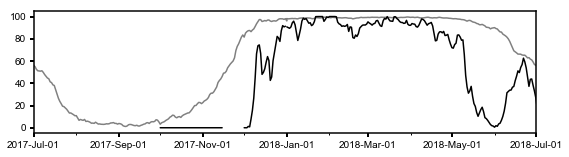

In [54]:
fig = plt.figure(1,figsize=(9,2.25))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(dfm_d['datetime'],dfm_d['dfm_d'],'grey')
plt.plot(dfm_d['datetime'][:366],df['2017'],'k')
plt.plot(dfm_d['datetime'][366:-1],df_2018['2018'],'k')
plt.xlim(['2017-07-01','2018-07-01'])

ax1.xaxis.set_major_locator(MonthLocator(bymonth=range(1,12,2)))
ax1.xaxis.set_minor_locator(MonthLocator(bymonth=range(2,13,2)))
xfmt = mdates.DateFormatter('%Y-%b-%d')
ax1.xaxis.set_major_formatter(xfmt)

fig.savefig('images/C2_PerIceCover_ltmean_2017t2018.png',dpi=300)
